In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_biv import categorical_solution_1

We'll continue to make use of the fuel economy dataset in this workspace.

In [3]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task**: Use a plot to explore whether or not there differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) **Note**: The dataset as provided does not retain any of the sorting of the 'VClass' variable, so you will also need to copy over any code you used previously to sort the category levels.

In [4]:
# select three major fueltype variable
fuel_econ1 = fuel_econ.copy()
rm_fuel = ['Diesel','Midgrade Gasoline','Natural Gas']
fuel_econ1 = fuel_econ1.query('fuelType not in @rm_fuel')

In [36]:
# check the composition of VClass variable 
fuel_econ1['VClass'].value_counts().to_frame().T

,Midsize Cars,Compact Cars,Subcompact Cars,Large Cars,Minicompact Cars
VClass,1149,1083,666,604,321


In [33]:
# check column names
fuel_econ1.columns.to_frame().T

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore


In [48]:
fuel_econ1.trans.value_counts().to_frame().T

,Automatic (S8),Automatic (S6),Manual 6-spd,Automatic (AM-S7),Automatic 7-spd,Automatic (variable gear ratios),Automatic 6-spd,Automatic 8-spd,Manual 5-spd,Automatic (S7),...,Automatic (AM-S8),Automatic 4-spd,Automatic (AV-S8),Automatic 5-spd,Automatic (S5),Automatic (S9),Automatic (S10),Automatic (A1),Automatic (AV-S10),Automatic (AM8)
trans,779,737,642,226,204,178,126,126,126,98,...,27,25,22,19,14,14,13,7,3,2


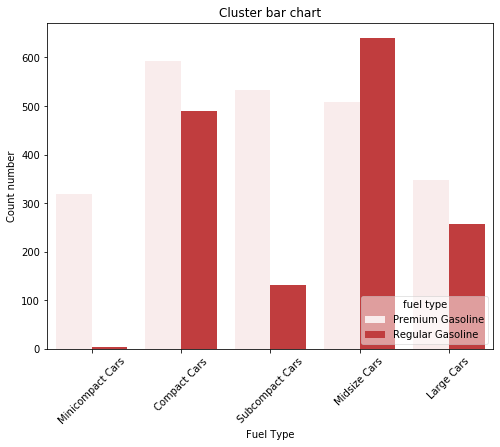

In [37]:
# create a large figure
plt.figure(figsize=[8, 6])

sb_color =sb.color_palette()[3] # set color
type_order = ['Minicompact Cars','Compact Cars','Subcompact Cars','Midsize Cars','Large Cars'] # create an order list

 # use countplot to make cluster bar chart
ax = sb.countplot(data=fuel_econ1, x='VClass', hue='fuelType', 
                  order= type_order, color=sb_color) # use countplot
ax.legend(loc=4, ncol=1, framealpha=.5, title='fuel type') # change the legend position
plt.xlabel('Fuel Type') # change labels
plt.ylabel('Count number')
plt.xticks(rotation=45)
plt.title('Cluster bar chart'); # add a figure title

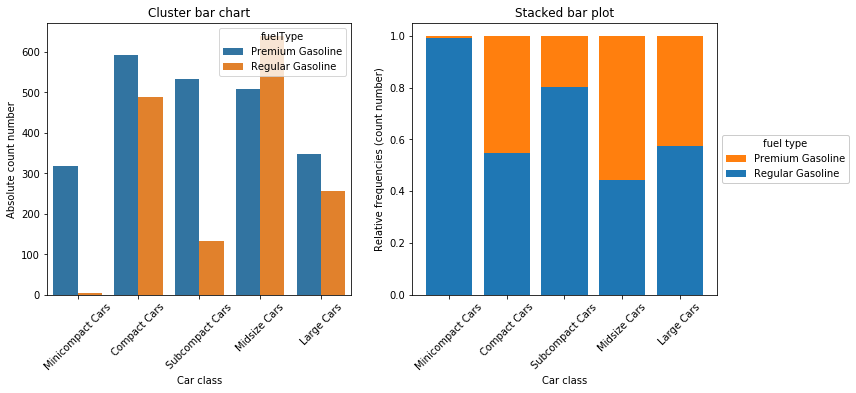

In [75]:
cat1_order = ['Minicompact Cars','Compact Cars','Subcompact Cars','Midsize Cars','Large Cars']
cat2_order = ['Premium Gasoline', 'Regular Gasoline']

plt.figure(figsize = [12, 5])

# left plot: clustered bar chart, absolute counts
plt.subplot(1, 2, 1)
sb.countplot(data = fuel_econ1, x = 'VClass', hue='fuelType',
             order= cat1_order)
ax.legend(loc=4, ncol=1, framealpha=.5, title='fuel type')
plt.xlabel('Car class') # change labels
plt.ylabel('Absolute count number')
plt.xticks(rotation=45)
plt.title('Cluster bar chart');

# right plot: stacked bar chart, absolute counts
plt.subplot(1, 2, 2)

artists = [] # for storing references to plot elements
baselines = np.zeros(len(cat1_order))
cat1_counts = fuel_econ1['VClass'].value_counts()

# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = fuel_econ1[fuel_econ1['fuelType'] == cat2]['VClass'].value_counts()
    inner_props = inner_counts / cat1_counts
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(cat1_order)),
                   height = inner_props[cat1_order],
                   bottom = baselines)
    artists.append(bars)
    baselines += inner_props[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order, rotation=45)
plt.legend(reversed(artists), cat2_order, framealpha = 1, title='fuel type',
           bbox_to_anchor = (1, 0.5), loc = 6)
plt.xlabel('Car class') 
plt.ylabel('Relative frequencies (count number)')
plt.title('Stacked bar plot');

I chose a clustered bar chart instead of a heat map in this case since there weren't a lot of numbers to plot. If you chose a heat map, did you remember to add a color bar and include annotations? From this plot, you can see that more cars use premium gas over regular gas, and that the smaller cars are biased towards the premium gas grade. It is only in midsize sedans where regular gasoline was used in more cars than premium gasoline.


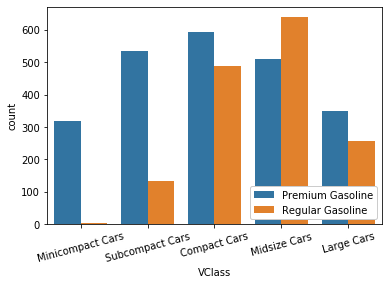

In [6]:
# run this cell to check your work against ours
categorical_solution_1()